In [24]:
import numpy as np
import pylab as plt

points_list = [(0,1),(1,5),(5,6),(5,4),(1,2),(2,3),(2,7),(1,8),(8,9),(9,7)]

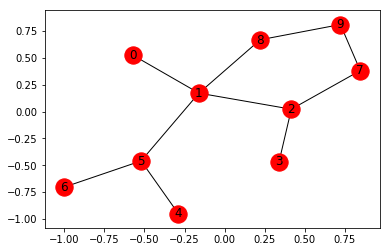

In [25]:
goal = 7

import networkx as nx
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [26]:
MATRIX_SIZE = 10

R = np.matrix(np.ones(shape = (MATRIX_SIZE,MATRIX_SIZE)))
R*=-1

In [27]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [28]:
for point in points_list:

    if point[1] == goal:
            R[point] = 100
    else:
        R[point] = 0
    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[goal,goal] = 100
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.,   0.],
        [ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1., 100.,   0.,  -1.]])

In [29]:
gamma = 0.8
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
initial_state = 5

def available_action(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [30]:
available_act = available_action(5)

In [31]:
print(available_act)

[1 4 6]


In [32]:
def sample_next_action(available_act):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

In [33]:
action

1

In [41]:
def update(current_state,action,gamma = 0.8):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    print(max_index)
    if max_index.shape[0]>1:
        max_index = int(np.random.choice(max_index,size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action,max_index]
    
    Q[current_state,action] = R[current_state,action]+ (gamma*max_value)
    print('max_value' , Q[current_state,action])
    
    if np.max(Q) > 0:
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state,action,gamma)
    

[2]
max_value 315.3883139815727


1414.1935766875185

[1]
max_value 255.97277741064642
Score: 1434.6608539162983
[7]
max_value 399.965971763308
Score: 1434.6608539162983
[7]
max_value 499.95746470413496
Score: 1434.6608539162983
[7]
max_value 399.965971763308
Score: 1434.6673411007866
[7]
max_value 399.965971763308
Score: 1434.6673411007866
[1]
max_value 255.97277741064642
Score: 1434.6673411007866
[2]
max_value 319.965971763308
Score: 1434.6673411007866
[7]
max_value 499.95746470413496
Score: 1434.6673411007866
[2]
max_value 319.965971763308
Score: 1434.6673411007866
[2]
max_value 319.965971763308
Score: 1434.6673411007866
[2]
max_value 319.965971763308
Score: 1434.6673411007866
[5]
max_value 204.77822192851715
Score: 1434.6714928988588
[2]
max_value 319.965971763308
Score: 1434.6714928988588
[7]
max_value 399.965971763308
Score: 1434.6714928988588
[1]
max_value 255.97277741064642
Score: 1434.6714928988588
[2]
max_value 319.965971763308
Score: 1434.6714928988588
[7]
max_value 399.965971763308
Score: 1434.673194455446
[2]
max_value 319.96

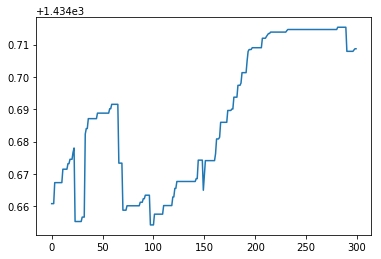

In [44]:
#Training
scores = []
for i in range(300):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_act = available_action(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print('Score:',str(score))

print("Trained Q Matrix:")
print(Q/np.max(Q)*100)

#Testing
current_state = 0
steps = [current_state]

while current_state != goal:
    
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0]>1:
        next_step_index = int(np.random.choice(next_step_index,size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most Efficient Path:")
print(steps)

plt.plot(scores)
plt.show()